# 预备知识

In [1]:
# 去除warning警报
import warnings
warnings.filterwarnings('ignore')
# 导入数据集方法
from sklearn.datasets import load_boston

# 加载数据
boston = load_boston()
# 查看数据结构
boston.keys()
# 获取数据特征矩阵
X = boston['data']
# 获取数据响应变量
y = boston['target']
# 导入模型
from sklearn.linear_model import LinearRegression
# 创建模型
lr = LinearRegression()
# 模型训练
lr.fit(X, y)
# 模型预测
yhat = lr.predict(X)
# 模型评估
from sklearn.metrics import mean_squared_error, r2_score
# 计算均方误差并打印
MSE = mean_squared_error(y, yhat)
print(MSE)
# 计算均方根误差并打印
RMSE = mean_squared_error(y, yhat)**0.5
print(RMSE)
# 计算均方误差并打印
r_2 = r2_score(y, yhat)
print(r_2)

21.894831181729202
4.679191295697281
0.7406426641094095


# 变量选择法

In [2]:
# 去除warning警报
import warnings 
warnings.filterwarnings("ignore")
# 导入加载数据集的方法
from sklearn.datasets import load_boston
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
# 加载数据集
boston = load_boston()
# 查看数据集结构
boston.keys()
# 导入特征数据
X = boston.data
# 导入响应变量
y = boston.target
# 查看数据集形状
print("特征数据形状：",X.shape)
print("响应变量形状：",y.shape)
# 按照7：3的比例切割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)
# 查看训练集形状
print("训练集特征维度", X_train.shape)

print("训练集响应变量维度", y_train.shape)
print("测试集特征维度", X_test.shape)
print("测试集响应变量维度", y_test.shape)

特征数据形状： (506, 13)
响应变量形状： (506,)
训练集特征维度 (354, 13)
训练集响应变量维度 (354,)
测试集特征维度 (152, 13)
测试集响应变量维度 (152,)


### 1.1查看特征与响应变量相关性

<BarContainer object of 14 artists>

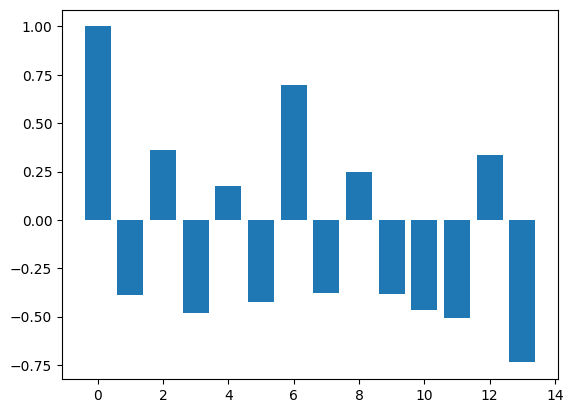

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 将响应变量和特征拼接在一起
full = np.hstack((y.reshape(-1,1),X))
# 利用相关性函数计算响应变量与特征相关性
corr = np.corrcoef(full.T)[0,:]
# 利用柱状图展示相关性
plt.bar(np.arange(0,14),corr)

### 2.线性回归模型

In [4]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
# 创建线性回归模型
lr = LinearRegression()
# 使用线性回归模型拟合训练集数据
lr.fit(X_train, y_train)
# 使用拟合之后的模型预测数据
yhat = lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
# 计算模型均方误差
MSE = mean_squared_error(y_test, yhat)
print("模型均方误差",MSE)
# 计算模型均方根误差
RMSE = mean_squared_error(y_test, yhat)**0.5
print("模型均方根误差",RMSE)
# 计算模型R方
r_2 = r2_score(y_test, yhat)
print("模型R方",r_2)

模型均方误差 23.567253793508726
模型均方根误差 4.854611600685345
模型R方 0.698869135092066


### 3.向前变量选择法

In [5]:
# 导入变量选择法
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# 创建向前（Stepwise Regression）选择器
sfs_forward = SFS(lr,
                  k_features=9,
                  forward=True,
                  scoring='neg_mean_squared_error')
# 使用向前选择器拟合训练集数据
sfs_forward.fit(X_train, y_train)
# 输出最佳特征组合
print('Best feature subset:', sfs_forward.k_feature_idx_)
# 使用向前选择法转换训练集、测试集数据
X_sfs_train = sfs_forward.transform(X_train)
X_sfs_test = sfs_forward.transform(X_test)
# 查看转换后特征形状
print("向前选择后训练集特征形状：",X_sfs_train.shape)
print("向前选择后测试集特征形状：",X_sfs_test.shape)
# 使用转换后数据拟合模型
lr.fit(X_sfs_train, y_train)
# 使用拟合之后的模型预测数据
yhat = lr.predict(X_sfs_test)
# 导入均方误差方法，R方进行模型评估
from sklearn.metrics import mean_squared_error, r2_score
# 计算模型均方误差
MSE = mean_squared_error(y_test, yhat)
print("模型均方误差",MSE)
# 计算模型均方根误差
RMSE = mean_squared_error(y_test, yhat)**0.5
print("模型均方根误差",RMSE)
# 计算模型R方
r_2 = r2_score(y_test, yhat)
print("模型R方",r_2)

Best feature subset: (1, 3, 4, 5, 7, 8, 10, 11, 12)
向前选择后训练集特征形状： (354, 9)
向前选择后测试集特征形状： (152, 9)
模型均方误差 23.441045247672633
模型均方根误差 4.84159532051912
模型R方 0.700481766283608


### 4.向后变量选择法

In [6]:
# 导入变量选择法
# 导入变量选择法
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# 创建向后（Stepwise Regression）选择器
sfs_backward = SFS(lr,
                   k_features=9,
                   forward=False,
                   scoring='neg_mean_squared_error')
# 使用向后选择器拟合训练集数据
sfs_backward.fit(X_train, y_train)
# 输出最佳特征组合
print('Best feature subset:', sfs_backward.k_feature_idx_)
# 使用向后选择法转换训练集、测试集数据
X_sfs_backward_train = sfs_backward.transform(X_train)
X_sfs_backward_test = sfs_backward.transform(X_test)
# 查看转换后特征形状
print("向后选择后训练集特征形状：", X_sfs_backward_train.shape)
print("向后选择后测试集特征形状：", X_sfs_backward_test.shape)
# 使用转换后数据拟合模型
lr.fit(X_sfs_backward_train, y_train)
# 使用拟合之后的模型预测数据
yhat_backward = lr.predict(X_sfs_backward_test)
# 导入均方误差方法，R方进行模型评估
from sklearn.metrics import mean_squared_error, r2_score
# 计算模型均方误差
MSE_backward = mean_squared_error(y_test, yhat_backward)
print("模型均方误差", MSE_backward)
# 计算模型均方根误差
RMSE_backward = mean_squared_error(y_test, yhat_backward)**0.5
print("模型均方根误差", RMSE_backward)
# 计算模型R方
r_2_backward = r2_score(y_test, yhat_backward)
print("模型R方", r_2_backward)


Best feature subset: (1, 4, 5, 7, 8, 9, 10, 11, 12)
向后选择后训练集特征形状： (354, 9)
向后选择后测试集特征形状： (152, 9)
模型均方误差 23.33839324006559
模型均方根误差 4.830982637110756
模型R方 0.7017934035284938
